In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('/mnt/d/Documents/Code/Mashine_Learning/course_data/11-Linear-Regression/USA_Housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


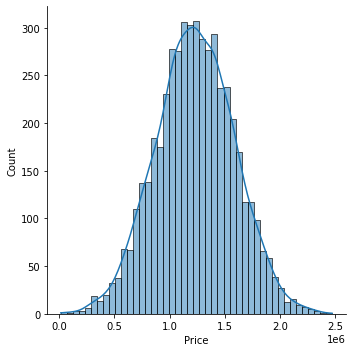

In [3]:
# sns.pairplot(df)
sns.displot(df['Price'], kde=True)

<AxesSubplot:>

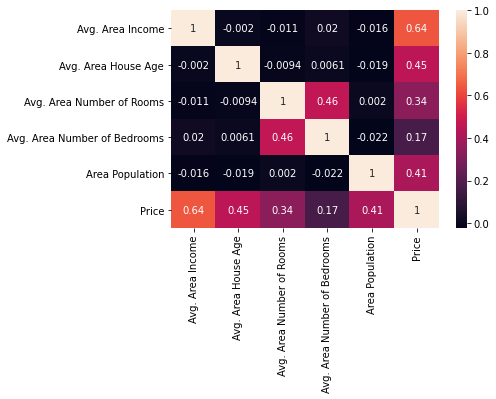

In [4]:
sns.heatmap(df.corr(), annot=True)

In [5]:
df .columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
## get all columns 
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
# target variable (want to predict the price)
y = df['Price']

## splite data for training train_test_split , alocate 40% fortest size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [7]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [8]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


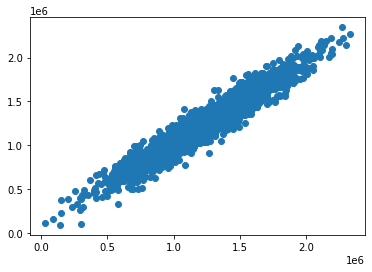

In [9]:
# todo repeat the proces with the real data 
#  the real data set for testing from boston #################
# boston = load_boston()
# # print(boston.keys())
# boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
# print(boston_df.head())

predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

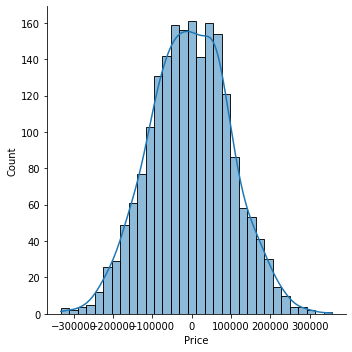

In [10]:
sns.displot(y_test-predictions, kde=True)
# this is sine fo good choice od data 
# y_test is actual data and  - my_prediction  look the same data so we can see gaues bell

In [11]:
# get mean absolute metrics for cteating the line 
metrics.mean_absolute_error(y_test, predictions)

82288.22251914951

In [12]:
metrics.mean_squared_error(y_test, predictions)

10460958907.208992

In [13]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922290904